In [193]:
!#/usr/bin/python3

In [194]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [195]:
import pandas as pd
import numpy as np 

pd.__version__

'1.3.5'

In [196]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [197]:
alcohol = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv', 
            usecols=['country', 'wine_servings'], index_col='country', squeeze=True)

alcohol.replace(0, np.nan, inplace=True)

In [198]:
type(alcohol)

alcohol.head()

pandas.core.series.Series

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [199]:
# Series sizing with .size, .shape, and len()

alcohol.size

193

In [200]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4., 100.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97., 370.,  59.,   1., 149., 175.,
        10., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1., 120.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,  10.,   5.,  nan,   1.,   8.,  nan, 190.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan, 140.,  nan,   

In [201]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [202]:
alcohol.index.size == alcohol.values.size

True

In [203]:
alcohol.shape
# returns a tuple

(193,)

In [204]:
len(alcohol)

# len and size are the same for series
# size is pandas specific
# length is Python built-in

193

In [205]:
# Unique values and Series monotonicity

alcohol.head()


country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [206]:
# Unique values and Series monotonicity

# checks if the series contains a sequence of unique values

alcohol.is_unique

False

In [207]:
# The first five records are a unique sequence of values

alcohol.head().is_unique

True

In [208]:
# Count of unique values in the sequence 
alcohol.nunique()

alcohol.nunique(dropna=True)

78

78

In [209]:
# monotonicity - function preserves a given order
# e.g. always increasing or always decreasing 

pd.Series([1,2,3]).is_monotonic

pd.Series([1,2,3,3,3,3,4]).is_monotonic

pd.Series([1,2,3,4,55,67,78,100]).is_monotonic

pd.Series([1,2,3,5,9,8,99.9]).is_monotonic

True

True

True

False

In [210]:
pd.Series(reversed([1,2,3,3,4,4,10,79,199])).is_monotonic_decreasing

pd.Series(reversed([1,2,3,3,4,4,10,79,199])).is_monotonic_increasing

True

False

In [211]:
# Count - returns only count of non-NA values

alcohol.size

alcohol.count()

193

162

In [212]:
alcohol.hasnans 

True

In [213]:
# Assessing and Counting NAs

# Returns boolean value True if value is null

alcohol.isnull()

# Only countries with missing wine_servings data are selected
# Since there are no missing values, no output is displayed

alcohol[alcohol.isnull()]

alcohol[alcohol.isnull()].index

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [214]:
type(alcohol[alcohol.isnull()].index)

# isolating the nulls
# boolean masking 
# then getting index from boolean masks

list(alcohol[alcohol.isnull()].index)

len(list(alcohol[alcohol.isnull()].index))

# Is there is a non-cumbersome approach for this?

pandas.core.indexes.base.Index

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

31

In [215]:
# Pandorable solution - Pandas + adorable

alcohol.isnull().sum()

# Booleans are integers in Python, True = 1 and False=0
# Example

sum([True, False, True])

31

2

In [216]:
# Another approach

# Sequential - apply function to values in a sequence 
# Veccotrized - apply function to series all at once

# ufunc --> Universal function

np.isnan


<ufunc 'isnan'>

In [217]:
ser = pd.Series(data=[True, False, None, 2], dtype=float)

np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [218]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [219]:
# Pandas has really good interoperability with numpy

alcohol[np.isnan].size

31

In [220]:
# notnull() and notna()

alcohol.notnull() # --> returns a boolean mask

alcohol[alcohol.notnull()] 
alcohol.loc[alcohol.notnull()]

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [221]:
alcohol.isnull().sum()
# same as -- in this case
alcohol.isna().sum()


alcohol.notnull().sum()
# same as 
alcohol.count()
# because count() method only cosiders non-NA 

31

31

162

162

In [222]:
# Booleans are literal numbers in Python 
# True = 1, False = 0 or essentially anything other than 1

# Example
True + True + False

True + True + False - True * 3


2

-1

In [223]:
# mro - method resolution order

bool.__mro__

(bool, int, object)

In [224]:
# Skill Challenge

# 1. Isolate the non-null in the alcohol series and assign them to the variable wine_servings

wine_servings = alcohol[alcohol.notnull()]
wine_servings.head()


# 2. What is the total wine consumed by countries in wine_servings?

wine_servings.sum()

# 3. What is the total wine consumed by countries that consumed less than 100 servings?

wine_servings[wine_servings<100].sum()



country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

9544.0

2319.0

In [225]:
# dropna() and fillna()

# dropna()
# excludes nulls, but does so without replacing the original
alcohol.dropna()

# modifies the original series
alcohol.dropna(inplace=True)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [226]:
# fillna()

# fills NaNs without modifying the original
alcohol.fillna(100, inplace=False)

# fills NaNs and modifies original
# inplace parameters is False by default
alcohol.fillna(100, inplace=True)


country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [227]:
# Descriptive Statistics

# Sum of wine servings across all countries 
alcohol.sum()

# Number of non-null rows
alcohol.count()

9544.0

162

In [228]:
# Average or Mean
alcohol.sum()/alcohol.count()

alcohol.mean()

58.91358024691358

58.91358024691358

In [229]:
# Median

alcohol.median()

alcohol.quantile(q=.5)

13.5

13.5

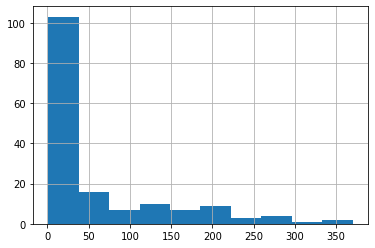

In [230]:
# Skew 
# Mean is so much higher than median
# Wine servings is positively skewed

# Indicates that there countries with large values 
# that skew the distribution to the left 

alcohol.hist();

In [231]:
# IQR - the difference between the first and third quartiles

iqr = alcohol.quantile(.75) - alcohol.quantile(.25)
iqr

79.25

In [232]:
alcohol.min()
alcohol.max()

1.0

370.0

In [233]:
# Std Dev - square root of the variance
alcohol.std()

# Variance 
alcohol.var()


alcohol.std()**2 == alcohol.var()

83.74817287794488

7013.756460394142

False

In [234]:
# All the above could be achieved using
# describe() method

alcohol.describe()

count    162.000000
mean      58.913580
std       83.748173
min        1.000000
25%        4.000000
50%       13.500000
75%       83.250000
max      370.000000
Name: wine_servings, dtype: float64

In [235]:
# Statistics of data in that quartile range
alcohol.describe(percentiles=[.79,.19])

count    162.000000
mean      58.913580
std       83.748173
min        1.000000
19%        2.000000
50%       13.500000
79%      113.570000
max      370.000000
Name: wine_servings, dtype: float64

In [236]:
alcohol.describe(percentiles=[.79,.19], include=float, exclude=object)

count    162.000000
mean      58.913580
std       83.748173
min        1.000000
19%        2.000000
50%       13.500000
79%      113.570000
max      370.000000
Name: wine_servings, dtype: float64

In [237]:
# mode - value with highest frequency

alcohol.mode()

0    1.0
dtype: float64

In [238]:
alcohol[alcohol == 1].size

25

In [239]:
alcohol.value_counts()
# same as
alcohol.value_counts(sort=True, ascending=False, dropna=True, normalize=False)

1.0      25
7.0       9
2.0       9
8.0       7
9.0       6
         ..
78.0      1
165.0     1
237.0     1
12.0      1
220.0     1
Name: wine_servings, Length: 78, dtype: int64

1.0      25
7.0       9
2.0       9
8.0       7
9.0       6
         ..
78.0      1
165.0     1
237.0     1
12.0      1
220.0     1
Name: wine_servings, Length: 78, dtype: int64

In [240]:
alcohol.value_counts(normalize=True)
# count of values / number of non-null values

# Relative frequencies
# Value 0 represents 16% of all values
# Value 1 represents 12.95% of all values

1.0      0.154321
7.0      0.055556
2.0      0.055556
8.0      0.043210
9.0      0.037037
           ...   
78.0     0.006173
165.0    0.006173
237.0    0.006173
12.0     0.006173
220.0    0.006173
Name: wine_servings, Length: 78, dtype: float64

In [241]:
# idxmax() and idxmin()

# Get index of the max value
alcohol[alcohol == alcohol.max()].index[0]

# same as
alcohol.idxmax()

# To get the value with the max value
alcohol[alcohol.idxmax()]

# However the idxmax() returns only the top value 
# Then
alcohol[alcohol == alcohol.max()]



'France'

'France'

370.0

country
France    370.0
Name: wine_servings, dtype: float64

In [242]:
# Get index of the min value

# Get index of the min value
alcohol[alcohol == alcohol.min()].index[0]

# same as
alcohol.idxmin()

# However the idxmin() retuns only the top value when order is sorted
alcohol[alcohol == alcohol.min()]

'Brunei'

'Brunei'

country
Brunei                      1.0
Cambodia                    1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [243]:
# Sorting with sort_values()

alcohol.sort_values()

alcohol.sort_values(ascending=False, na_position='last') # Sorts reverse


country
Guyana           1.0
Comoros          1.0
Mali             1.0
Malawi           1.0
Chad             1.0
               ...  
Denmark        278.0
Switzerland    280.0
Andorra        312.0
Portugal       339.0
France         370.0
Name: wine_servings, Length: 162, dtype: float64

country
France              370.0
Portugal            339.0
Andorra             312.0
Switzerland         280.0
Denmark             278.0
                    ...  
Niger                 1.0
Cambodia              1.0
Oman                  1.0
Papua New Guinea      1.0
Fiji                  1.0
Name: wine_servings, Length: 162, dtype: float64

In [244]:
# We can specify the sorting algorithm

alcohol.sort_values(ascending=False, na_position='last', kind='quicksort') # mergesort, heapsort

country
France              370.0
Portugal            339.0
Andorra             312.0
Switzerland         280.0
Denmark             278.0
                    ...  
Niger                 1.0
Cambodia              1.0
Oman                  1.0
Papua New Guinea      1.0
Fiji                  1.0
Name: wine_servings, Length: 162, dtype: float64

In [245]:
# modifies original series without creating a copy
alcohol.sort_values(ascending=False, na_position='last', kind='quicksort', inplace=True) 

In [246]:
# nlargest() and nsmallest()

# Example: get top 10 wine consuming countries

alcohol.sort_values(ascending=False)[:10]

# Pandorable way
alcohol.nlargest(n=10)


country
France               370.0
Portugal             339.0
Andorra              312.0
Switzerland          280.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Name: wine_servings, dtype: float64

country
France               370.0
Portugal             339.0
Andorra              312.0
Switzerland          280.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Name: wine_servings, dtype: float64

In [247]:
alcohol.nsmallest(5)
# better alterative than sorting a series

country
Tanzania    1.0
Guyana      1.0
Haiti       1.0
Vietnam     1.0
Gambia      1.0
Name: wine_servings, dtype: float64

In [248]:
# Sorting with sort_index()

alcohol.head()
# Currently series is sorted in descending order

country
France         370.0
Portugal       339.0
Andorra        312.0
Switzerland    280.0
Denmark        278.0
Name: wine_servings, dtype: float64

In [249]:
alcohol.sort_index()

alcohol.sort_index(ascending=False, na_position='first')

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

country
Zimbabwe               4.0
Zambia                 4.0
Vietnam                1.0
Venezuela              3.0
Vanuatu               11.0
                     ...  
Antigua & Barbuda     45.0
Angola                45.0
Andorra              312.0
Algeria               14.0
Albania               54.0
Name: wine_servings, Length: 162, dtype: float64

In [250]:
alcohol.index.isnull().sum()

0

In [251]:
alcohol.head()

country
France         370.0
Portugal       339.0
Andorra        312.0
Switzerland    280.0
Denmark        278.0
Name: wine_servings, dtype: float64

In [252]:
# sort_values() - returns a new series, sorted by values

# sort_index() - returns a new series, sorted by index labels

# parameters: ascending = True, inplace=False, na_position='last', sort='quicksort'

In [253]:
# Skills Challenge

# 1. Select all the countries from alcohol that have more than 
#    50 wine servings and save them (and the corresponding values)
#    in a variable fifty_plus

fifty_plus = alcohol[alcohol > 50]
fifty_plus.head()
fifty_plus.count()

# 2. From fifty_plus, choose the countries with the smallest 20 wine
#    serving values.

fifty_plus.nsmallest(n=20)

# 3. Mean, median, and standard deviation of sample from step 2

fifty_plus.nsmallest(20).describe()

fifty_plus.nsmallest(20).mean()

fifty_plus.nsmallest(20).median()

fifty_plus.nsmallest(20).std()

country
France         370.0
Portugal       339.0
Andorra        312.0
Switzerland    280.0
Denmark        278.0
Name: wine_servings, dtype: float64

55

country
Seychelles             51.0
Bahamas                51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Cook Islands           74.0
Paraguay               74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Canada                100.0
Spain                 112.0
Name: wine_servings, dtype: float64

count     20.000000
mean      73.600000
std       17.866169
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      112.000000
Name: wine_servings, dtype: float64

73.6

73.5

17.866169147301836

In [254]:
# Series Arithemetics and fill_value()

# Add 2 to every value - vectorized
alcohol + 2

country
France              372.0
Portugal            341.0
Andorra             314.0
Switzerland         282.0
Denmark             280.0
                    ...  
Niger                 3.0
Cambodia              3.0
Oman                  3.0
Papua New Guinea      3.0
Fiji                  3.0
Name: wine_servings, Length: 162, dtype: float64

In [255]:
alcohol.sort_index(inplace=True)
alcohol.head()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

In [256]:
more_drinks = pd.Series({'Albania': 6, 'Algeria': 10})
alcohol + more_drinks
# Only gives overlapping index values

Albania              60.0
Algeria              24.0
Andorra               NaN
Angola                NaN
Antigua & Barbuda     NaN
                     ... 
Vanuatu               NaN
Venezuela             NaN
Vietnam               NaN
Zambia                NaN
Zimbabwe              NaN
Length: 162, dtype: float64

In [257]:
# Instead 

alcohol.add(more_drinks, fill_value=0)
# Fills 0 value for NaN values, and merges both Series

Albania               60.0
Algeria               24.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Length: 162, dtype: float64

In [258]:
alcohol.subtract(more_drinks, fill_value=0)

Albania               48.0
Algeria                4.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Length: 162, dtype: float64

In [259]:
alcohol.divide(more_drinks, fill_value=1)

Albania                9.0
Algeria                1.4
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Length: 162, dtype: float64

In [260]:
alcohol.multiply(more_drinks, fill_value=1)

Albania              324.0
Algeria              140.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Length: 162, dtype: float64

In [261]:
# Variance and Standard Deviation

# Variance - average of squared differences from the mean
# Std Dev - square root of variance

(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

# same as 
alcohol.var()

# Std Dev 

np.sqrt((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1))
alcohol.std()


7013.756460394142

7013.756460394142

83.74817287794488

83.74817287794488

In [262]:
## Cumulative Operations

# sum() - gives total of all values
alcohol.sum()

# The last value will be the sum of the entire series
alcohol.cumsum()


9544.0

country
Albania                54.0
Algeria                68.0
Andorra               380.0
Angola                425.0
Antigua & Barbuda     470.0
                      ...  
Vanuatu              9532.0
Venezuela            9535.0
Vietnam              9536.0
Zambia               9540.0
Zimbabwe             9544.0
Name: wine_servings, Length: 162, dtype: float64

In [263]:
alcohol.cumsum(skipna=True) # True by default

alcohol.cumsum(skipna=False)

# Because
np.nan + 123

country
Albania                54.0
Algeria                68.0
Andorra               380.0
Angola                425.0
Antigua & Barbuda     470.0
                      ...  
Vanuatu              9532.0
Venezuela            9535.0
Vietnam              9536.0
Zambia               9540.0
Zimbabwe             9544.0
Name: wine_servings, Length: 162, dtype: float64

country
Albania                54.0
Algeria                68.0
Andorra               380.0
Angola                425.0
Antigua & Barbuda     470.0
                      ...  
Vanuatu              9532.0
Venezuela            9535.0
Vietnam              9536.0
Zambia               9540.0
Zimbabwe             9544.0
Name: wine_servings, Length: 162, dtype: float64

nan

In [264]:
# Product of all values
alcohol.prod()

# Cumulative product
alcohol.cumprod()

alcohol.cumprod()[-1] == alcohol.prod()

3.427611505218278e+194

country
Albania               5.400000e+01
Algeria               7.560000e+02
Andorra               2.358720e+05
Angola                1.061424e+07
Antigua & Barbuda     4.776408e+08
                         ...      
Vanuatu              7.140857e+192
Venezuela            2.142257e+193
Vietnam              2.142257e+193
Zambia               8.569029e+193
Zimbabwe             3.427612e+194
Name: wine_servings, Length: 162, dtype: float64

True

In [265]:
alcohol.min()

# minimum value of all the preceding values
alcohol.cummin()

1.0

country
Albania              54.0
Algeria              14.0
Andorra              14.0
Angola               14.0
Antigua & Barbuda    14.0
                     ... 
Vanuatu               1.0
Venezuela             1.0
Vietnam               1.0
Zambia                1.0
Zimbabwe              1.0
Name: wine_servings, Length: 162, dtype: float64

In [266]:
alcohol.max()

# maximum value of all the preceding values
alcohol.cummax()

370.0

country
Albania               54.0
Algeria               54.0
Andorra              312.0
Angola               312.0
Antigua & Barbuda    312.0
                     ...  
Vanuatu              370.0
Venezuela            370.0
Vietnam              370.0
Zambia               370.0
Zimbabwe             370.0
Name: wine_servings, Length: 162, dtype: float64

In [267]:
# Pairwise differences

alcohol.head()

# Difference between the element and it's previous one
alcohol.diff().head()

# Period parameter in diff
alcohol.diff(periods=2).head()

# Periods parameter could also be negative 
# periods=1  --> v2-v1, v3-v2,..
# periods=-1 --> v1-v2, v2-v3,..
# periods=2  --> v3-v1, v4-v2,..

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

country
Albania                NaN
Algeria              -40.0
Andorra              298.0
Angola              -267.0
Antigua & Barbuda      0.0
Name: wine_servings, dtype: float64

country
Albania                NaN
Algeria                NaN
Andorra              258.0
Angola                31.0
Antigua & Barbuda   -267.0
Name: wine_servings, dtype: float64

In [268]:
# Series Iteration

# Iterate over each element in the series

mini_alc = alcohol[:5]

# Method 1: Pythonic way

for i in mini_alc:
    print (i)
    
# Get index labels
for i in mini_alc.index:
    print (i)
    
# Get values as well as the index
for i in mini_alc.index:
    print (i, mini_alc[i])

54.0
14.0
312.0
45.0
45.0
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0


In [269]:
# Method 2: A Pandorable way

# Series is essentially a Dict data structure
# Lazy eval -- only accesses when asked
# very performant
for i in mini_alc.items():
    print (i)
    
for i in mini_alc.iteritems():
    print (i)

('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)


In [270]:
# Filtering: filter(), where(), and mask()

# Filtering by specifying a text pattern
alcohol.filter(regex='^V')

alcohol.filter(like='stan')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

country
Kazakhstan      12.0
Kyrgyzstan       6.0
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [271]:
alcohol[alcohol > 200]

alcohol.loc[alcohol > 200]

def gt200(x):
    return x > 200

alcohol[gt200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
France               370.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Switzerland          280.0
Uruguay              220.0
Name: wine_servings, dtype: float64

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
France               370.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Switzerland          280.0
Uruguay              220.0
Name: wine_servings, dtype: float64

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
France               370.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Switzerland          280.0
Uruguay              220.0
Name: wine_servings, dtype: float64

In [272]:
# the where() method
# Helps us efficiently replace values

# Replaces all other values to nans by default
alcohol.where(lambda x: x>200)

alcohol.where(lambda x: x>200).dropna()

alcohol.where(lambda x: x>200, other='too small')

country
Albania                NaN
Algeria                NaN
Andorra              312.0
Angola                 NaN
Antigua & Barbuda      NaN
                     ...  
Vanuatu                NaN
Venezuela              NaN
Vietnam                NaN
Zambia                 NaN
Zimbabwe               NaN
Name: wine_servings, Length: 162, dtype: float64

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
France               370.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Switzerland          280.0
Uruguay              220.0
Name: wine_servings, dtype: float64

country
Albania              too small
Algeria              too small
Andorra                  312.0
Angola               too small
Antigua & Barbuda    too small
                       ...    
Vanuatu              too small
Venezuela            too small
Vietnam              too small
Zambia               too small
Zimbabwe             too small
Name: wine_servings, Length: 162, dtype: object

In [273]:
# the mask() method

# where() replaces when condition is False
# mask() replaces when condition is True

# When condition is not met, the replace with nans

alcohol.where(lambda x: x<=200).dropna()
# same
alcohol.mask(lambda x: x>200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 147, dtype: float64

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 147, dtype: float64

In [274]:
# Transforming with update(), apply(), and map()

alcohol.head(5)

# spot vs global transforms
alcohol.loc['Algeria'] = 19
alcohol.head(5)

# Can get repetitive when needing to update multiple values

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

country
Albania               54.0
Algeria               19.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

In [275]:
# Spot transforms

alcohol.update(pd.Series(data=[200,20], index=['Albania', 'Algeria']))
alcohol.head()

# What if we want something more global?

country
Albania              200.0
Algeria               20.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

In [276]:
# the apply() method

# applies transformation to each and every element in the series

# Method 1
alcohol.apply(lambda x: x**2)

# Method 2
alcohol.apply(np.square)

# Method 3
def multiply_by_self(x):
    return x*x

alcohol.apply(multiply_by_self)

country
Albania              40000.0
Algeria                400.0
Andorra              97344.0
Angola                2025.0
Antigua & Barbuda     2025.0
                      ...   
Vanuatu                121.0
Venezuela                9.0
Vietnam                  1.0
Zambia                  16.0
Zimbabwe                16.0
Name: wine_servings, Length: 162, dtype: float64

country
Albania              40000.0
Algeria                400.0
Andorra              97344.0
Angola                2025.0
Antigua & Barbuda     2025.0
                      ...   
Vanuatu                121.0
Venezuela                9.0
Vietnam                  1.0
Zambia                  16.0
Zimbabwe                16.0
Name: wine_servings, Length: 162, dtype: float64

country
Albania              40000.0
Algeria                400.0
Andorra              97344.0
Angola                2025.0
Antigua & Barbuda     2025.0
                      ...   
Vanuatu                121.0
Venezuela                9.0
Vietnam                  1.0
Zambia                  16.0
Zimbabwe                16.0
Name: wine_servings, Length: 162, dtype: float64

In [277]:
def multiply_by_self_with_min(x, min_servings):
    if x < min_servings:
        return x**2
    return x

alcohol.apply(multiply_by_self_with_min, args=(200,))
# same as
alcohol.apply(multiply_by_self_with_min, min_servings=200)
    

country
Albania               200.0
Algeria               400.0
Andorra               312.0
Angola               2025.0
Antigua & Barbuda    2025.0
                      ...  
Vanuatu               121.0
Venezuela               9.0
Vietnam                 1.0
Zambia                 16.0
Zimbabwe               16.0
Name: wine_servings, Length: 162, dtype: float64

country
Albania               200.0
Algeria               400.0
Andorra               312.0
Angola               2025.0
Antigua & Barbuda    2025.0
                      ...  
Vanuatu               121.0
Venezuela               9.0
Vietnam                 1.0
Zambia                 16.0
Zimbabwe               16.0
Name: wine_servings, Length: 162, dtype: float64

In [278]:
# the map() method

# A substitution method 
alcohol.map(np.square)

alcohol.map(lambda x: x**2)

# In simple transforms, map() and apply() are equivalent
# If tranform is complex, use apply()


country
Albania              40000.0
Algeria                400.0
Andorra              97344.0
Angola                2025.0
Antigua & Barbuda     2025.0
                      ...   
Vanuatu                121.0
Venezuela                9.0
Vietnam                  1.0
Zambia                  16.0
Zimbabwe                16.0
Name: wine_servings, Length: 162, dtype: float64

country
Albania              40000.0
Algeria                400.0
Andorra              97344.0
Angola                2025.0
Antigua & Barbuda     2025.0
                      ...   
Vanuatu                121.0
Venezuela                9.0
Vietnam                  1.0
Zambia                  16.0
Zimbabwe                16.0
Name: wine_servings, Length: 162, dtype: float64

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
Name: beer_servings, dtype: float64

count    178.000000
mean     115.106742
std      100.306000
min        1.000000
25%       26.500000
50%       82.000000
75%      193.750000
max      376.000000
Name: beer_servings, dtype: float64

82.0

115.1067415730337

100.30599995319724

<AxesSubplot:>

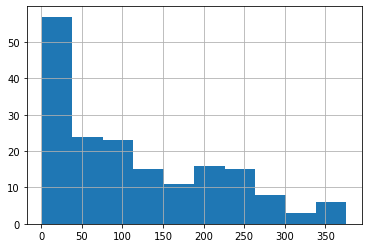

In [279]:
# Skills Challenge 

# 1. Read the drinks.csv dataset again, this time 
#     bringing the beer_servings sequence into a 
#     new series with country again acting as the
#     index. Assign this series to the variable beers
    
    
beers = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv', 
            usecols=['country', 'beer_servings'], index_col='country').squeeze()

beers.replace(0, np.nan, inplace=True)
beers.head()


# 2. Calculate the mean, median, and standard deviation
#     of beer servings in beers. Is the distribution
#     left skewed or right skewed?

beers.describe()
beers.median()
beers.mean()
beers.std()
beers.hist()

# Mean is larger than the median. Most data lies to the left
# of the distribution, making it positively skewed.

In [280]:
# 3. Slice the first 10 countries from beers. Are these 
#     relatively large or small relative to the rest of 
#     the sample?
(beers[:10]-beers.mean())
(beers[:10] - beers.mean()).apply(lambda x: 'low' if x<0 else 'high').value_counts()
(beers - beers.mean()).apply(lambda x: 'low' if x<0 else 'high').value_counts()


country
Afghanistan                 NaN
Albania              -26.106742
Algeria              -90.106742
Andorra              129.893258
Angola               101.893258
Antigua & Barbuda    -13.106742
Argentina             77.893258
Armenia              -94.106742
Australia            145.893258
Austria              163.893258
Name: beer_servings, dtype: float64

high    6
low     4
Name: beer_servings, dtype: int64

low     105
high     88
Name: beer_servings, dtype: int64

In [281]:
# If a Z-score is 0, it indicates that the data point's 
# score is identical to the mean score.

# Method 1

def calculate_zscore(x, mean_value, std_value):
    return (x-mean_value)/std_value

beers.apply(calculate_zscore, args=(beers.mean(), beers.std(), ))

beers.apply(calculate_zscore, mean_value=beers.mean(), std_value=beers.std())



# BONUS: To answer that, we could compare each value to 
#     the mean or median. An even better approach would 
#     be to calculate the standard scores, or z-scores 
#     as they are known. 
# z = (x - mu)/std


country
Afghanistan         NaN
Albania       -0.260271
Algeria       -0.898319
Andorra        1.294970
Angola         1.015824
                 ...   
Venezuela      2.172285
Vietnam       -0.040942
Yemen         -1.087739
Zambia        -0.828532
Zimbabwe      -0.509508
Name: beer_servings, Length: 193, dtype: float64

country
Afghanistan         NaN
Albania       -0.260271
Algeria       -0.898319
Andorra        1.294970
Angola         1.015824
                 ...   
Venezuela      2.172285
Vietnam       -0.040942
Yemen         -1.087739
Zambia        -0.828532
Zimbabwe      -0.509508
Name: beer_servings, Length: 193, dtype: float64

In [285]:
# 4. Create a new series that uses series arithmetics to 
#     calculate the z-score for each serving by subtracting
#     from each the mean and dividing the difference by the 
#     standard deviation. Point the variable z-scores to this
#     series.

z_scores = (beers - beers.mean())/beers.std()
z_scores[:10]

z_scores.min()
z_scores.max()
z_scores.abs().max()



    
#     Which country has the largest absolute z-score? Is this 
#     a positive or a negative deviation?

beers.idxmax()
beers['Namibia']
# or simply 
beers[beers.idxmax()]

country
Afghanistan               NaN
Albania             -0.260271
Algeria             -0.898319
Andorra              1.294970
Angola               1.015824
Antigua & Barbuda   -0.130668
Argentina            0.776556
Armenia             -0.938197
Australia            1.454482
Austria              1.633933
Name: beer_servings, dtype: float64

-1.1375864018730273

2.60097360625186

2.60097360625186

'Namibia'

376.0

376.0